In [1]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np

K = np.array([[215.6810060961547, 0.0, 376.5], [0.0, 215.6810060961547, 240.5], [0.0, 0.0, 1.0]],dtype=np.float32)

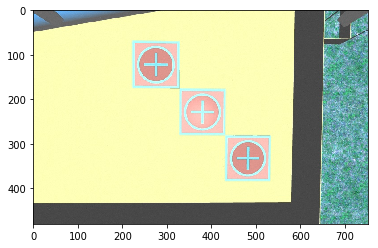

In [4]:
img = cv.imread("Base/img1.jpg")

plt.imshow(img)
plt.show()

In [19]:


base = cv.imread("base.png", cv.IMREAD_GRAYSCALE)

for i in range(0, 2023):
    name = "/home/elton/Documentos/GitHub/drone_data/Bases/img/frame" + ((4-len(str(i)))*"0"+str(i)) + ".jpg"

    img = cv.imread(name)

    hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

    kernel = np.ones((5,5),"uint8")

    #Filtragem da cor azul
    min_azul = np.array([110,60,50], np.uint8)
    max_azul = np.array([120,255,255], np.uint8)
    masc_azul = cv.inRange(hsv,min_azul,max_azul)
    masc_azul = cv.dilate(masc_azul,kernel)
    masc_azul = cv.dilate(masc_azul,kernel)


    min_amarelo = np.array([20,50,50], np.uint8)
    max_amarelo = np.array([25,255,255], np.uint8)
    masc_amarelo = cv.inRange(hsv,min_amarelo,max_amarelo)
    masc_amarelo = cv.dilate(masc_amarelo,kernel)
    #masc_azul = cv.bitwise_or(masc_azul,masc_azul,mask=masc_amarelo)
    #masc = masc_azul + masc_amarelo

    masc = masc_azul

    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)


    res_azul = cv.bitwise_and(gray,gray,mask=masc_azul)

    kernel = np.ones((5,5),np.uint8)


    #masc = cv.morphologyEx(masc, cv.MORPH_CLOSE, kernel, iterations=1)
    #masc = cv.morphologyEx(masc, cv.MORPH_OPEN, kernel, iterations=10)
    masc = cv.morphologyEx(masc, cv.MORPH_CLOSE, kernel, iterations=10)
    #masc = cv.erode(masc, kernel, iterations=5)

    quadrados = procuraQuadrado(masc)

    #salvaTodosQuadrados(quadrados, img, i)


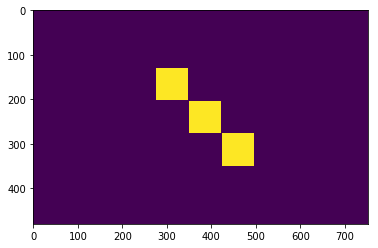

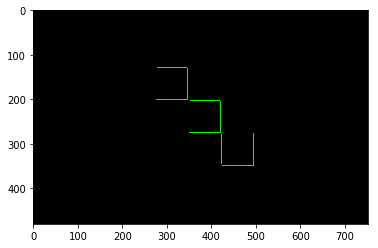

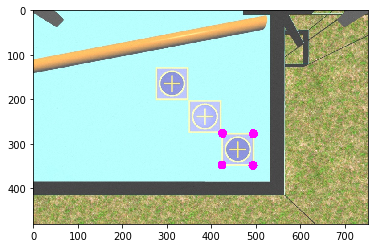

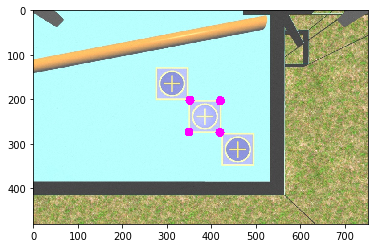

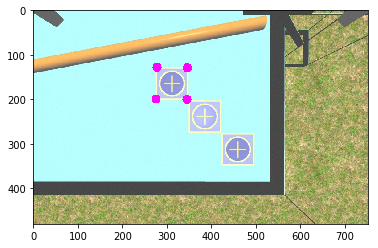

In [20]:
plt.imshow(masc)
plt.show()

bordas = cv.Canny(masc, 100, 500, kernel)
contours,hierarchy = cv.findContours(bordas, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)

imgContours = cv.drawContours(np.zeros_like(img), contours, -1, (0,255,0), 1)

plt.imshow(imgContours)
plt.show()

imprimeTodosQuadrados(quadrados, img)

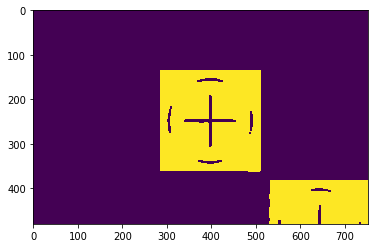

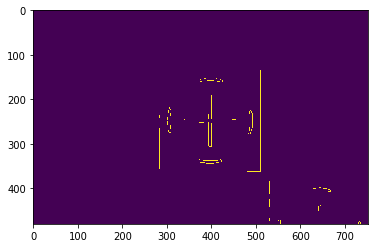

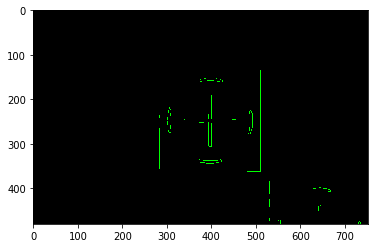

In [12]:
#gauss = cv.(masc, (5,5), 2)

bordas = cv.Canny(masc, 100, 500, kernel)
contours,hierarchy = cv.findContours(bordas, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)

imgContours = cv.drawContours(np.zeros_like(img), contours, -1, (0,255,0), 1)

plt.imshow(masc)
plt.show()

plt.imshow(bordas)
plt.show()

plt.imshow(imgContours)
plt.show()

In [3]:
def procuraQuadrado(mascara):
    kernel = np.ones((5,5),np.uint8)
    
    bordas = cv.Canny(mascara, 100, 500, kernel)
    contours,hierarchy = cv.findContours(bordas, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)

    quadrados = []

    for i in range(len(contours)):
        epsilon = 0.1*cv.arcLength(contours[i],True)
        approx = cv.approxPolyDP(contours[i],epsilon,True)

        if(len(approx) < 4):
            continue

        if not cv.isContourConvex(approx):
            continue

        if cv.contourArea(approx) < 1000:
            continue

        quadrado = []

        for point in approx:
            quadrado.append([point[0][0], point[0][1]])
        
        quadrados.append(quadrado)

    quadrados = np.array(quadrados)

    i = 0

    while(len(quadrados)-2 >= i):
        if np.linalg.norm(quadrados[i+1][0]-quadrados[i][0]) < 5:
            quadrados = np.delete(quadrados, i, 0)
            
        i+=1
    
    return quadrados



In [4]:
def imprimeQuadrado(quadrado, img):
    imgDraw = img.copy()
    
    for point in quadrado:
        cv.circle(imgDraw, (point[0], point[1]), 10, (255,0,255), -1)

    plt.imshow(cv.cvtColor(imgDraw,cv.COLOR_BGR2RGB))
    plt.show()

def imprimeTodosQuadrados(quadrados, img):
    for quad in quadrados:
        imprimeQuadrado(quad, img)


def salvaTodosQuadrados(quadrados, img, i):
    imgDraw = img.copy()
    
    for quad in quadrados:
        for point in quad:
            cv.circle(imgDraw, (point[0], point[1]), 10, (255,0,255), -1)

    cv.imwrite("result/"+str(i)+".png", imgDraw)

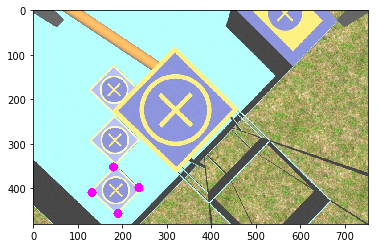

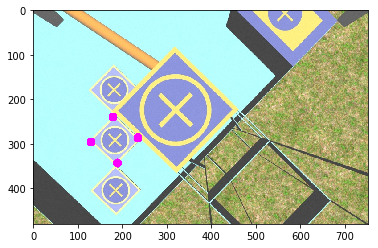

In [54]:
quad = procuraQuadrado(masc)
imprimeTodosQuadrados(quad, img)

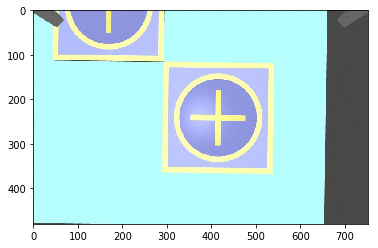

In [92]:
img = cv.imread("/home/elton/Documentos/GitHub/drone_data/Bases/img/frame1219.jpg")
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()

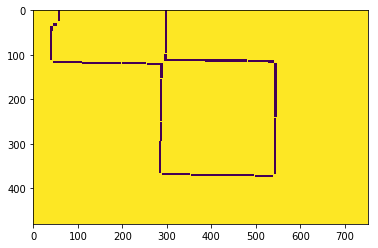

In [142]:
imgray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
imgray = cv.medianBlur(imgray,5).astype('uint8')

thresh = cv.adaptiveThreshold(masc,1,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,11,2)

closing = cv.morphologyEx(thresh, cv.MORPH_CLOSE, kernel)

contours, hierarchy = cv.findContours(closing, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)

imgContours = cv.drawContours(np.zeros_like(img), contours, -1, (0,255,0), 1)

plt.imshow(closing)
plt.show()

In [192]:
a = "1"

(4-len(a))*"0"+a

'0001'